In [36]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [3]:
%%time
df = load_breast_cancer()

Wall time: 0 ns


In [6]:
X = pd.DataFrame(df.data, columns=df.feature_names)
y = pd.Categorical.from_codes(df.target, df.target_names)

#encoder = LabelEncoder()
#binary_encoded_y = pd.Series(encoder.fit_transform(y))

#X_train, X_test, y_train, y_test = train_test_split(X, binary_encoded_y, random_state=1)

In [7]:
df = pd.concat([X, pd.DataFrame(y) ], axis=1)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,0
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,malignant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,malignant
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,malignant
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,malignant
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,malignant


In [8]:
df_1.columns

NameError: name 'df_1' is not defined

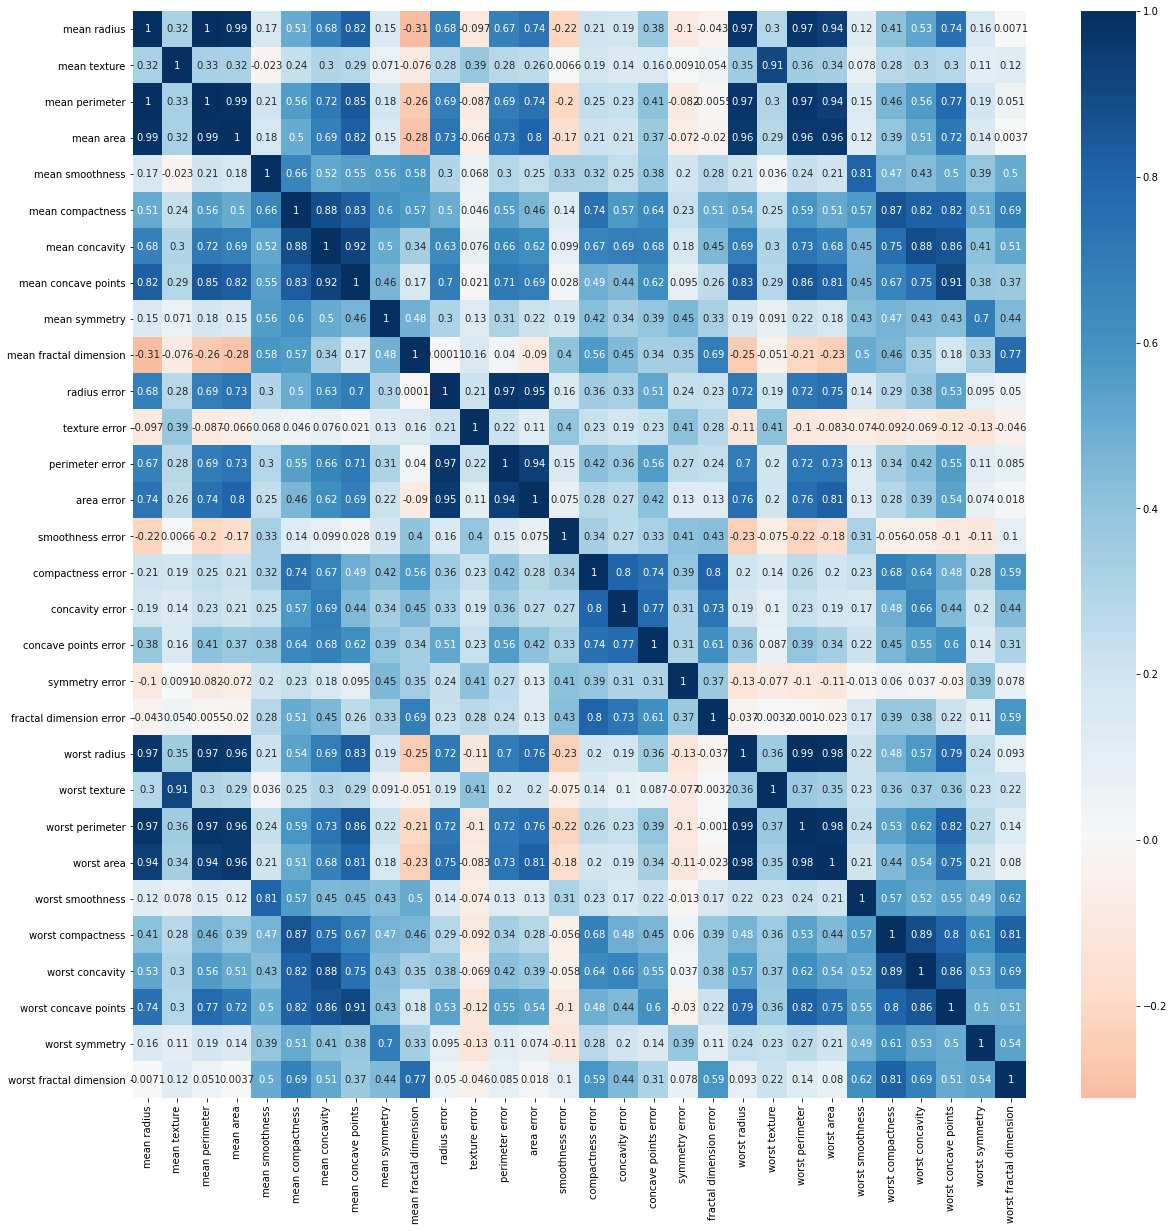

In [9]:
#plt.title("Features correlation")
a4_dims = (20, 20)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(
    X.corr(),
    annot=True,
    cmap='RdBu',
    center=0,
)
plt.show()

In [10]:
X_scaled = StandardScaler().fit_transform(X)

In [11]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [12]:
pca = PCA() 

principal_components = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(
        data=principal_components, 
        columns=[f'pc-{k}' for k in range(1, pca.n_components_+1)]
    )

df_pca.head()

,pc-1,pc-2,pc-3,pc-4,pc-5,pc-6,pc-7,pc-8,pc-9,pc-10,...,pc-21,pc-22,pc-23,pc-24,pc-25,pc-26,pc-27,pc-28,pc-29,pc-30
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398407,-0.157118,-0.877402,...,0.096515,0.068850,0.084519,-0.175256,-0.151020,-0.201503,-0.252585,-0.033914,0.045648,-0.047169
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240988,-0.711905,1.106995,...,-0.077327,-0.094578,-0.217718,0.011290,-0.170510,-0.041129,0.181270,0.032624,-0.005687,-0.001868
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097374,0.024066,0.454275,...,0.311067,-0.060309,-0.074291,0.102762,0.171158,0.004735,0.049569,0.047026,0.003146,0.000751
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059565,-1.405440,-1.116975,...,0.434193,-0.203266,-0.124105,0.153430,0.077496,-0.275225,0.183462,0.042484,-0.069295,-0.019937
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636376,-0.263805,0.377704,...,-0.116545,-0.017650,0.139454,-0.005332,0.003062,0.039254,0.032168,-0.034786,0.005038,0.021214


In [13]:
pca.explained_variance_ratio_.round(4)

array([4.427e-01, 1.897e-01, 9.390e-02, 6.600e-02, 5.500e-02, 4.020e-02,
       2.250e-02, 1.590e-02, 1.390e-02, 1.170e-02, 9.800e-03, 8.700e-03,
       8.000e-03, 5.200e-03, 3.100e-03, 2.700e-03, 2.000e-03, 1.800e-03,
       1.600e-03, 1.000e-03, 1.000e-03, 9.000e-04, 8.000e-04, 6.000e-04,
       5.000e-04, 3.000e-04, 2.000e-04, 1.000e-04, 0.000e+00, 0.000e+00])

In [14]:
pca.explained_variance_ratio_.cumsum().round(4)

array([0.4427, 0.6324, 0.7264, 0.7924, 0.8473, 0.8876, 0.9101, 0.926 ,
       0.9399, 0.9516, 0.9614, 0.9701, 0.9781, 0.9834, 0.9865, 0.9892,
       0.9911, 0.9929, 0.9945, 0.9956, 0.9966, 0.9975, 0.9983, 0.9989,
       0.9994, 0.9997, 0.9999, 1.    , 1.    , 1.    ])

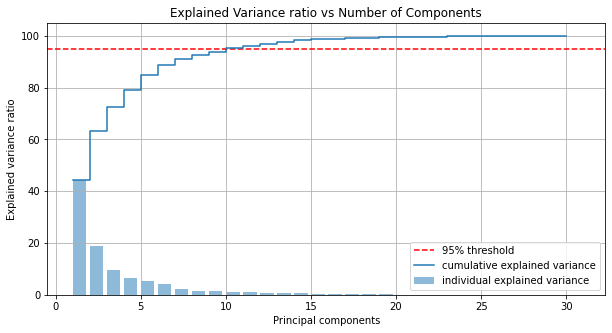

In [15]:
var_exp = pca.explained_variance_ratio_*100
cum_var_exp = pca.explained_variance_ratio_.cumsum()*100
components = range(1, len(var_exp) + 1)

plt.figure(figsize=(10, 5))
plt.axhline(y=95, color="red", linestyle="--", label="95% threshold")
plt.step(components, cum_var_exp, where='post',
        label='cumulative explained variance')
plt.bar(components, var_exp, alpha=0.5, align='edge',
        label='individual explained variance')
plt.title('Explained Variance ratio vs Number of Components')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.grid()
plt.show()

In [16]:
pca = PCA(n_components=10)

df_pca = pd.DataFrame(
        data=pca.fit_transform(X_scaled), 
        columns=[f'pc-{k}' for k in range(1, pca.n_components+1)]
    )

df_pca["cancer"] = y

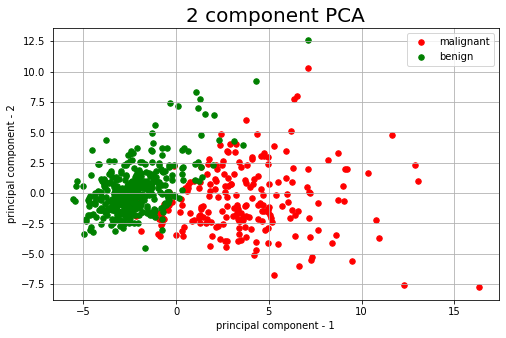

In [17]:
import matplotlib.pyplot as plt

cancer = df_pca['cancer'].unique()
colors = ['r', 'g']

fig, ax = plt.subplots(figsize = (8,5))
ax.set_title('2 component PCA', fontsize = 20)
for target, color in zip(cancer, colors):
    df_pca[df_pca.cancer == target].plot(ax=ax, kind="scatter", 
                                         x='pc-1', y = 'pc-2',
                                         c = color, s = 30)
ax.set_xlabel("principal component - 1")
ax.set_ylabel("principal component - 2")
ax.legend(cancer)
ax.grid()

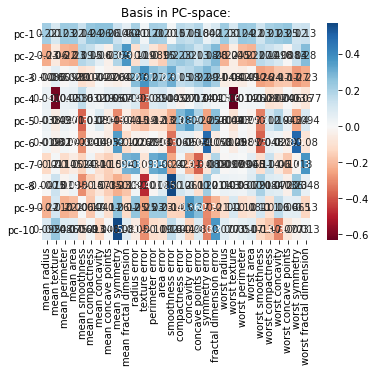

In [18]:
plt.title("Basis in PC-space:")
sns.heatmap(
    pca.components_, 
    xticklabels=X.columns, 
    yticklabels=[f"pc-{i}" for i in range(1, pca.n_components_ + 1)], 
    annot=True,
    cmap='RdBu',
    center=0,
)
plt.show()

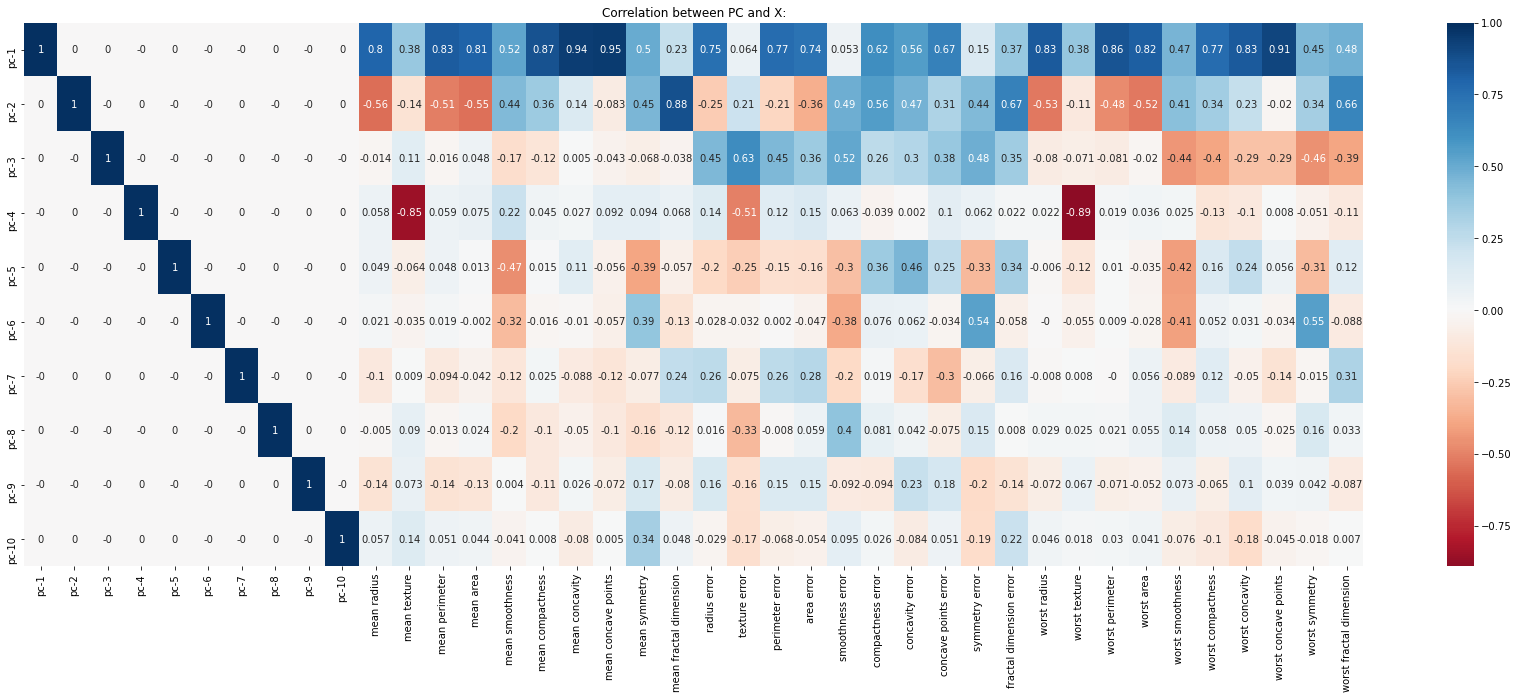

In [19]:
for col in X:
    df_pca[col] = df[col]

plt.figure(figsize=(30,10))
plt.title("Correlation between PC and X:")
sns.heatmap(
    df_pca.corr().round(3).iloc[:10], 
    annot=True, 
    cmap='RdBu',
    center=0,
)
plt.show()

In [24]:
X_pca = df_pca[['pc-1', 'pc-2', 'pc-3', 'pc-4', 'pc-5', 'pc-6', 'pc-7', 'pc-8', 'pc-9',
       'pc-10']]

In [23]:
df_pca[["cancer"]]

,cancer
0,malignant
1,malignant
2,malignant
3,malignant
4,malignant
...,...
564,malignant
565,malignant
566,malignant
567,malignant


In [27]:
encoder = LabelEncoder()
binary_encoded_y = pd.Series(encoder.fit_transform(df_pca[["cancer"]]))

X_train, X_test, y_train, y_test = train_test_split(X_pca, binary_encoded_y, random_state=1)

In [30]:
%%time
SVM_model = SVC(C= 1.5, degree= 1, kernel= 'linear')
SVM_model.fit(X_train, y_train)
y_pred = SVM_model.predict(X_test)
##1.43s

Wall time: 17 ms


In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        88
           1       0.96      0.96      0.96        55

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [37]:
accuracy_score(y_test, y_pred)

0.972027972027972

In [35]:
confusion_matrix(y_test, y_pred)

array([[86,  2],
       [ 2, 53]], dtype=int64)